In [11]:
import numpy as np
import sys
%cd ../src/fbi/
sys.path.insert(1, os.getcwd())
from optimizers import Optimizer
import matplotlib.pyplot as plt
import time
#  non-convex function to test the performance of methods with optimum at -1,1
fx = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
x = np.linspace(-3,3,200)
y = np.linspace(-3,3,200)
X, Y = np.meshgrid(x, y)
Z = fx(X,Y)
x = -2.5
y = -2.5
x_init = [x,y]
opt_x = [-1,1]

[Errno 2] No such file or directory: '../src/fbi/'
/home/gwan/Homework/cs107/git/cs107_project/src/fbi


In [31]:
def trace_plot(optimizers, fx,x_init,n_iter):
    x = np.linspace(-3,3,200)
    y = np.linspace(-3,3,200)
    X, Y = np.meshgrid(x, y)
    Z = fx(X,Y)
    fig = plt.figure(figsize = (16,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    iter_xs = []
    iter_ys = []
    iter_zs = []
    for k,v in optimizers.items():
        a = 0.000001
        if(k == 'ADAGRAD'):
            a = 0.5
        time,iter_z,iter_xy = v(x_init, fx, n_iter,verbose = True,alpha = a)
        iter_z = np.array(iter_z)
        iter_x = np.array(iter_xy)[:,0]
        iter_y = np.array(iter_xy)[:,1]
        iter_xs.append(iter_x)
        iter_ys.append(iter_y)
        iter_zs.append(iter_z)
        ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
        ax.plot(iter_x,iter_y, iter_z, marker = '*', alpha = .4,label = k)
        ax.legend()
        ax.set_title('f(x,y) = (1 - x)^2 + 100*(y - x^2)^2')
        ax.view_init(65, 34)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    plt.show()
    return iter_xs,iter_ys,iter_zs

In [32]:
optimizers = {"Momentum": Optimizer.momentum , "ADAGRAD": Optimizer.ADAGRAD,'GradientDescent': Optimizer.gradient_descent}

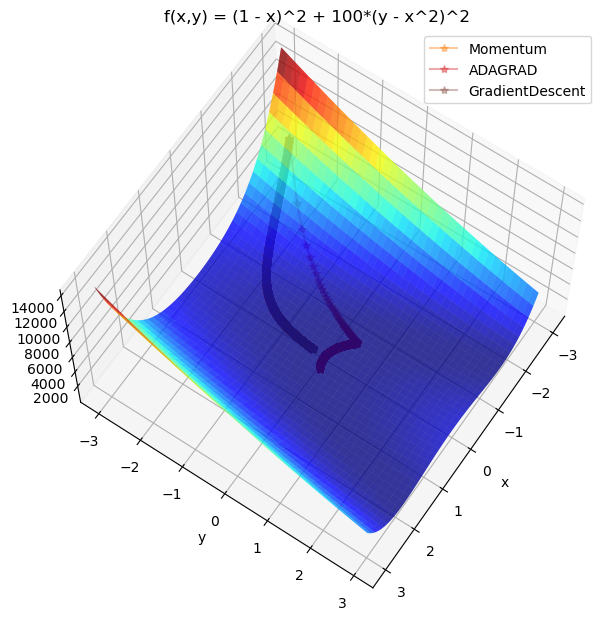

In [33]:
x,y,z = trace_plot(optimizers,fx,x_init,n_iter=10000) # Add more to the input dict for more plots

In [34]:
out = [[],[],[]]
for i,k in enumerate(optimizers.keys()):
    x[i] = x[i][::10]
    y[i] = y[i][::10]
    z[i] = z[i][::10]
    for j in range(len(x[i])):
        out[i].append((x[i][j],y[i][j],"%.32f" % z[i][j]))
    name = k + '.txt'
    with open(name,'w') as f:
        f.write(str(out[i]))
# This code save txt file which will be used for our actual plot on mathematica which is more beautiful

In [35]:
out[0]

[(-2.5, -2.5, '7668.50000000000000000000000000000000'),
 (-2.4640356095948825,
  -2.492791026458954,
  '7346.65877982494657771894708275794983'),
 (-2.396857875523196,
  -2.479168530763219,
  '6775.11448434401881968369707465171814'),
 (-2.322371523811739,
  -2.4637482080867774,
  '6184.53086904957035585539415478706360'),
 (-2.2491102157943383,
  -2.4481745728924276,
  '5645.56817139068334654439240694046021'),
 (-2.179793848901139,
  -2.433000157677637,
  '5171.81709883363055269001051783561707'),
 (-2.1150086875449605,
  -2.4183812742934556,
  '4759.17763433454001642530784010887146'),
 (-2.054605125651644,
  -2.4043347087631695,
  '4399.36960051066489540971815586090088'),
 (-1.9982164340473807,
  -2.3908315937001667,
  '4084.15252319597857422195374965667725'),
 (-1.945443404539018,
  -2.377831092989857,
  '3806.41625924343270526151172816753387'),
 (-1.8959144121121723,
  -2.3652919897595255,
  '3560.28819476625403694924898445606232'),
 (-1.8493004608647108,
  -2.353176271834094,
  '3340.